# Task 15 - Exploring with visuals and conclusions - due 23 August 2022

# Exploring with Visuals
Use `clean_08.csv` and `clean_18.csv` to answer the questions in each cell

In [1]:
# load datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clean_08 = pd.read_csv('clean_08.csv')
clean_08.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no


In [3]:
clean_18 = pd.read_csv('clean_18.csv')
clean_18.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No


In [4]:
# Compare the distributions of greenhouse gas score in 2008 and 2018: ______
# normal for both - both are skewed to the right - 2008 is more skewed to the left - 2018 is more skewed to the left
# Can you plot both in a single plot?

<Axes: >

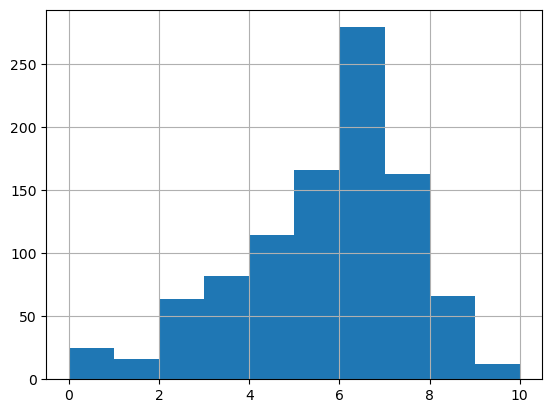

In [5]:
clean_08['greenhouse_gas_score'].hist()

<Axes: >

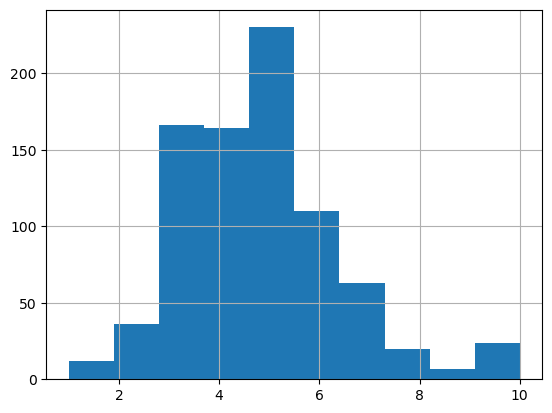

In [6]:
clean_18['greenhouse_gas_score'].hist()

In [7]:
# How has the distribution of combined mpg changed from 2008 to 2018?_______
# Stayed the same - became skewed in the opposite direction - Became much more skewed to the right - Moved closer to normal distribution
# You can plot the kde (look it up) to be sure of your answer

<Axes: >

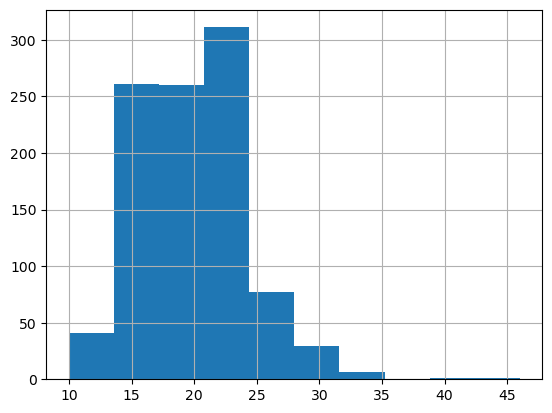

In [8]:
clean_08['cmb_mpg'].hist()

<Axes: >

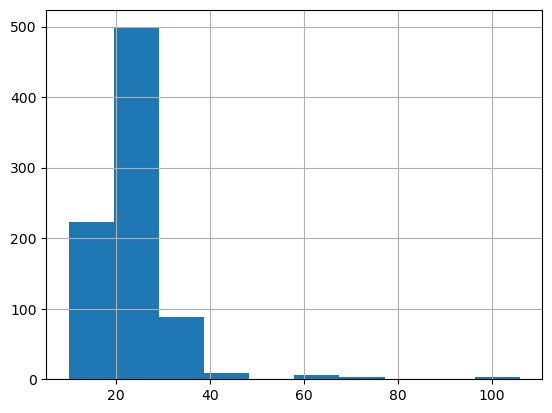

In [9]:
clean_18['cmb_mpg'].hist()

In [10]:
# Choose the correlation between engine displacement and combined mpg? __________
# Positive correlation - Negative - None

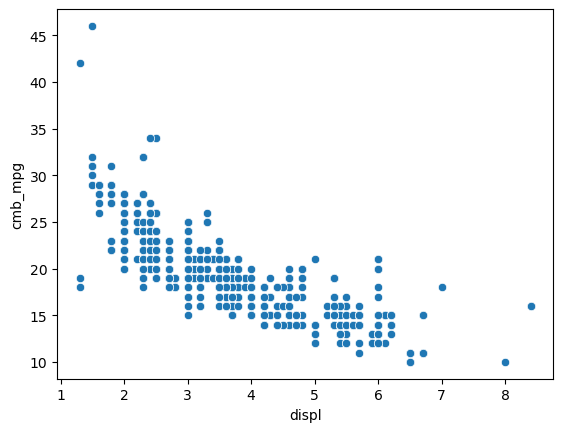

Correlation is -0.818798657199793


In [11]:
sns.scatterplot(data=clean_08, x='displ', y='cmb_mpg')
plt.show()

print(f"Correlation is {clean_08['displ'].corr(clean_08['cmb_mpg'])}")

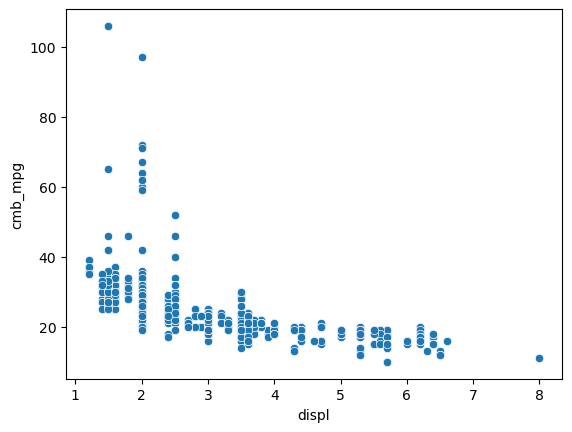

Correlation is -0.5748798408246336


In [12]:
sns.scatterplot(data=clean_18, x='displ', y='cmb_mpg')
plt.show()

print(f"Correlation is {clean_18['displ'].corr(clean_18['cmb_mpg'])}")

In [13]:
# Choose the correlation between greenhouse gas score and combined mpg? __________
# Positive correlation -- Negative - None

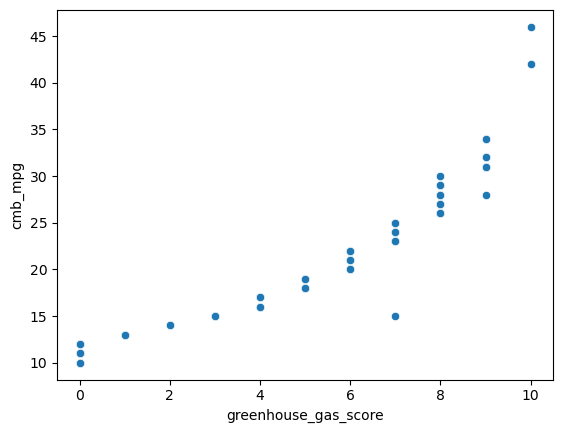

Correlation is 0.9476069827259938


In [14]:
sns.scatterplot(data=clean_08, x='greenhouse_gas_score', y='cmb_mpg')
plt.show()

print(f"Correlation is {clean_08['greenhouse_gas_score'].corr(clean_08['cmb_mpg'])}")

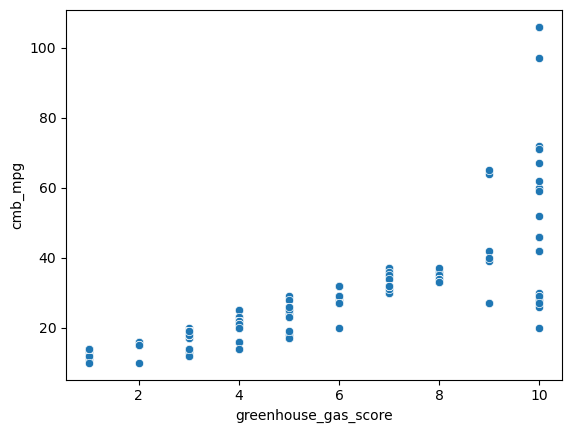

Correlation is 0.8149821636332624


In [15]:
sns.scatterplot(data=clean_18, x='greenhouse_gas_score', y='cmb_mpg')
plt.show()

print(f"Correlation is {clean_18['greenhouse_gas_score'].corr(clean_18['cmb_mpg'])}")

# Drawing Conclusions

### Q1: How much have vehicle classes improved in fuel economy in 2018 compared to 2008?  

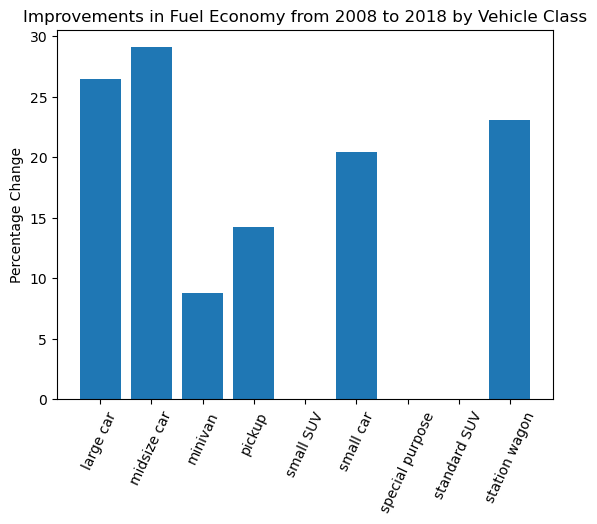

In [16]:
# use plots if you can

mpg_2008 = clean_08.groupby('veh_class')['cmb_mpg'].mean()
mpg_2018 = clean_18.groupby('veh_class')['cmb_mpg'].mean()
change = (mpg_2018 - mpg_2008) / mpg_2008 * 100
plt.bar(change.index, change.values)
plt.title("Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class")
plt.xticks(rotation=65)
plt.ylabel('Percentage Change')
plt.show()

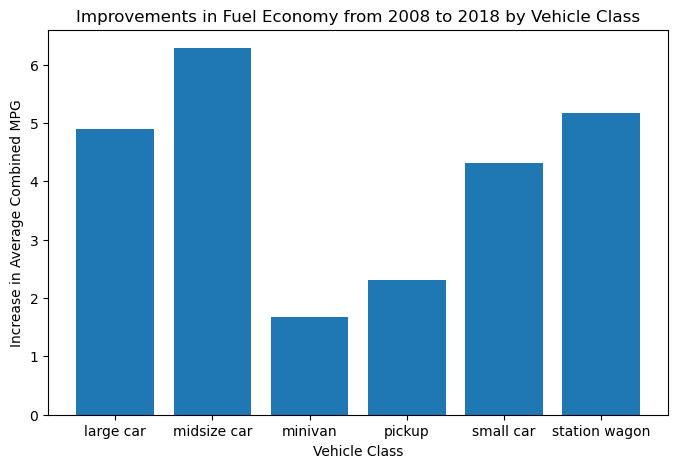

In [17]:
veh_08 = clean_08.groupby(['veh_class']).cmb_mpg.mean()
veh_18 = clean_18.groupby('veh_class').cmb_mpg.mean()
veh_18
inc = veh_18 - veh_08
inc
inc.dropna(inplace=True)
inc
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Q2: What are the characteristics of SmartWay vehicles? Have they changed over time?
Compare the following features --> drive, cyl, fuel in both datasets. Write your comments and findings in each cell  
Use plots

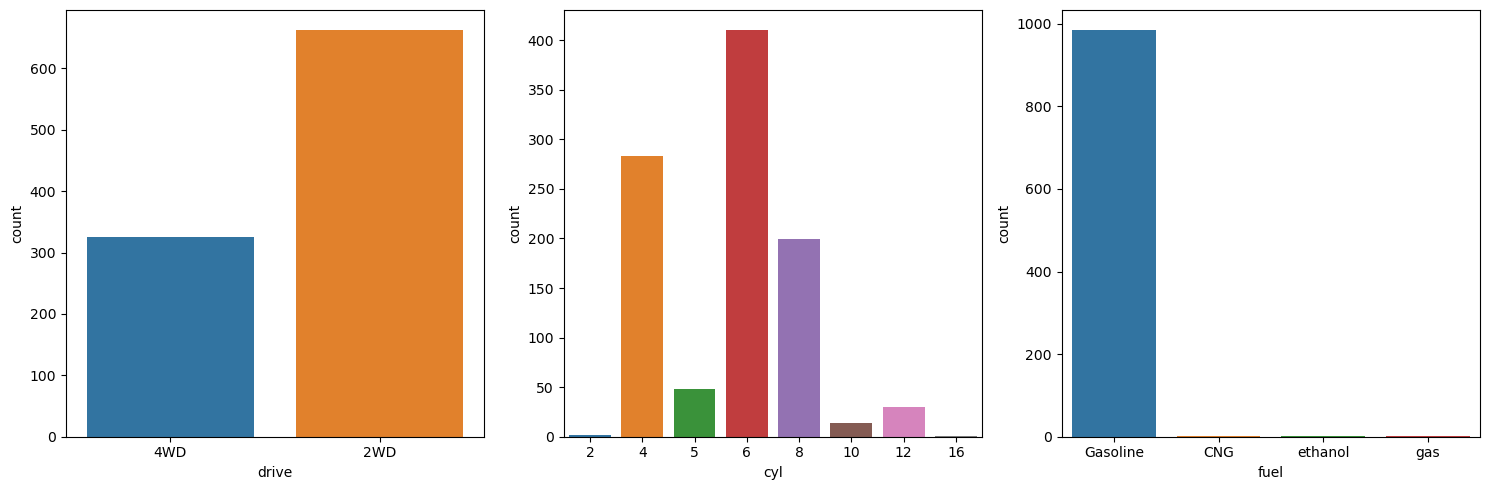

In [18]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.countplot(data=clean_08, x='drive', ax=axs[0])
sns.countplot(data=clean_08, x='cyl', ax=axs[1])
sns.countplot(data=clean_08, x='fuel', ax=axs[2])
plt.tight_layout()
plt.show()

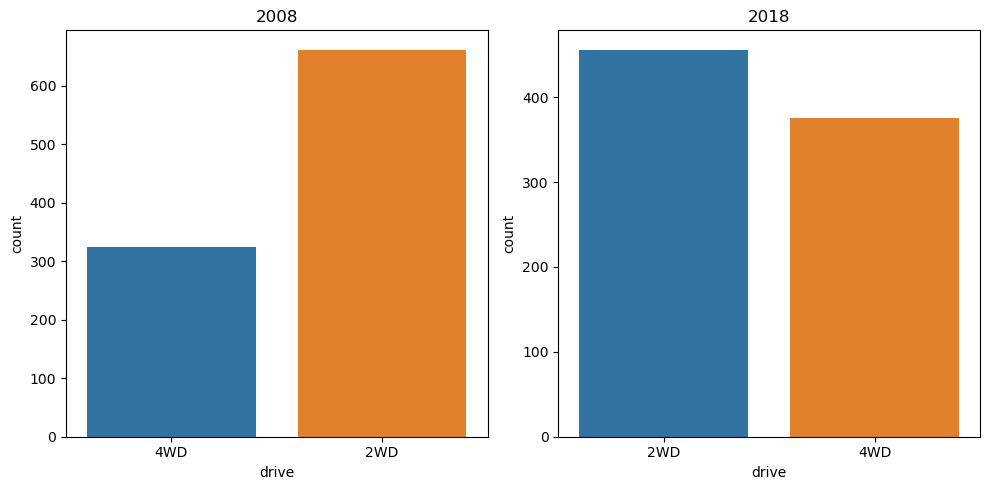

In [19]:
# compare drive

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sns.countplot(data=clean_08, x='drive', ax=axs[0])
sns.countplot(data=clean_18, x='drive', ax=axs[1])
axs[0].set_title('2008')
axs[1].set_title('2018')
plt.tight_layout()
plt.show()

In [20]:
# compare the number of cylinders
# Can you use a pie chart with the percentages shown?

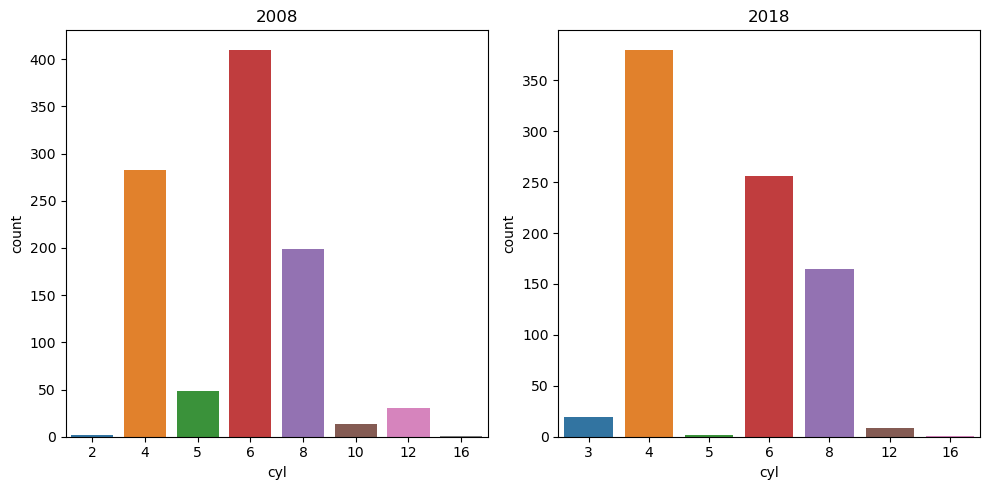

In [21]:
# compare the number of cylinders

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sns.countplot(data=clean_08, x='cyl', ax=axs[0])
sns.countplot(data=clean_18, x='cyl', ax=axs[1])
axs[0].set_title('2008')
axs[1].set_title('2018')
plt.tight_layout()
plt.show()

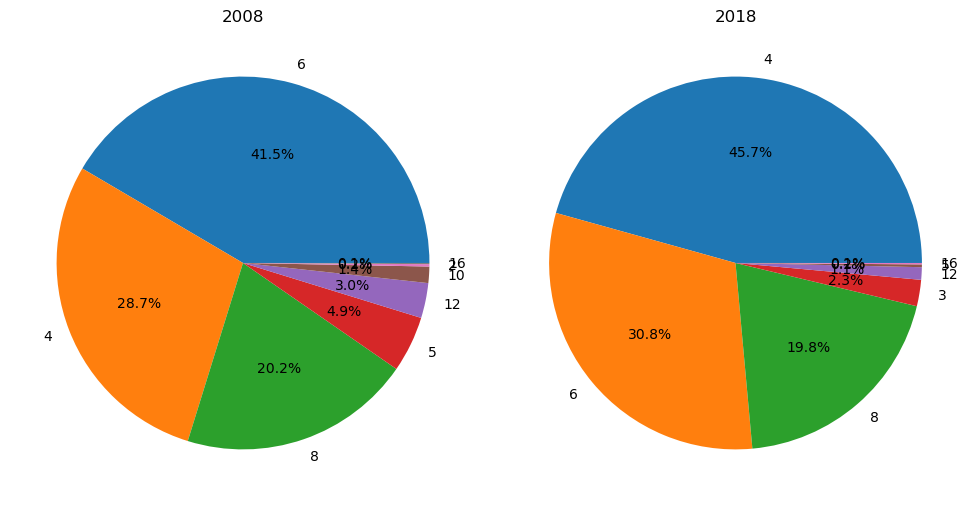

In [22]:
# Can you use a pie chart with the percentages shown?

# Pie chart for 2008
cyl_counts_2008 = clean_08['cyl'].value_counts()
labels_2008 = cyl_counts_2008.index.tolist()
sizes_2008 = cyl_counts_2008.values.tolist()

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
axs[0].pie(sizes_2008, labels=labels_2008, autopct='%1.1f%%')
axs[0].set_title('2008')


# Pie chart for 2018
cyl_counts_2018 = clean_18['cyl'].value_counts()
labels_2018 = cyl_counts_2018.index.tolist()
sizes_2018 = cyl_counts_2018.values.tolist()

axs[1].pie(sizes_2018, labels=labels_2018, autopct='%1.1f%%')
axs[1].set_title('2018')

plt.tight_layout()
plt.show()


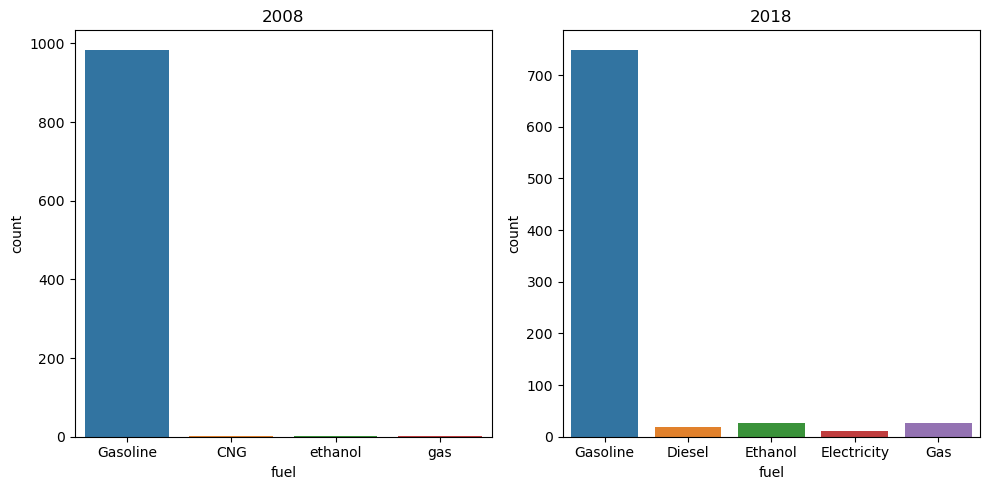

In [23]:
# compare the fuel used
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sns.countplot(data=clean_08, x='fuel', ax=axs[0])
sns.countplot(data=clean_18, x='fuel', ax=axs[1])
axs[0].set_title('2008')
axs[1].set_title('2018')
plt.tight_layout()
plt.show()

### Q3: What features (variables) are associated with better fuel economy (positive corr)? ـــــــــــ

In [24]:
clean_08.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no


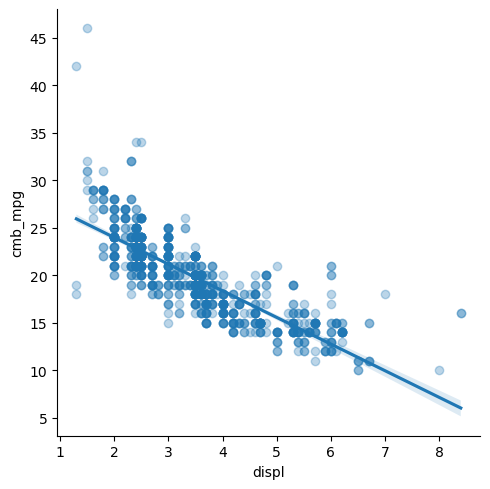

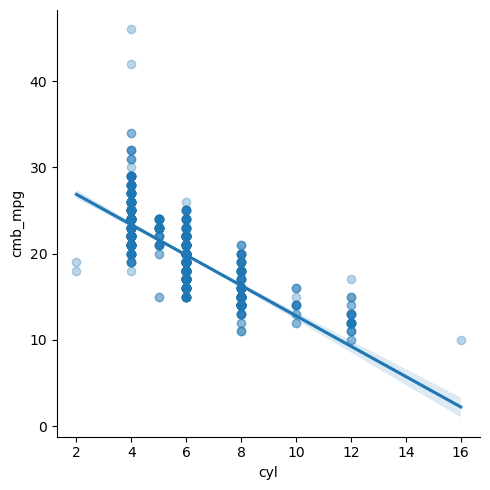

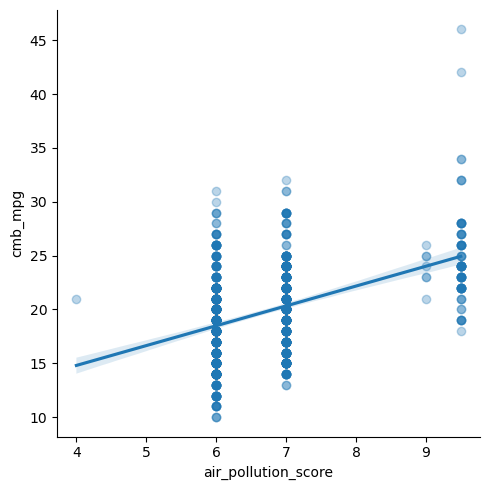

In [25]:
# use plots

sns.lmplot(data=clean_08, x='displ', y='cmb_mpg', scatter_kws={'alpha':0.3})
sns.lmplot(data=clean_08, x='cyl', y='cmb_mpg', scatter_kws={'alpha':0.3})
sns.lmplot(data=clean_08, x='air_pollution_score', y='cmb_mpg', scatter_kws={'alpha':0.3})
#sns.lmplot(data=clean_08, x='drive', y='cmb_mpg', scatter_kws={'alpha':0.3})
#sns.lmplot(data=clean_08, x='fuel', y='cmb_mpg', scatter_kws={'alpha':0.3})


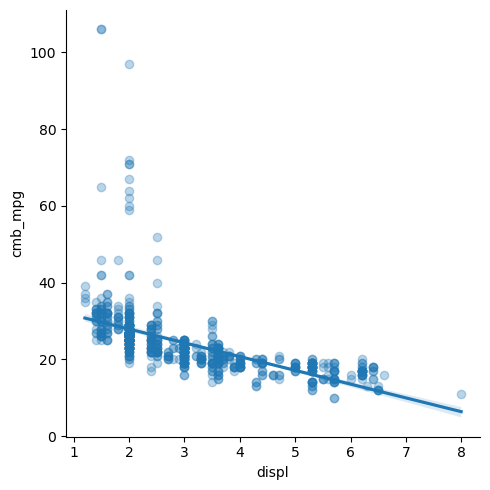

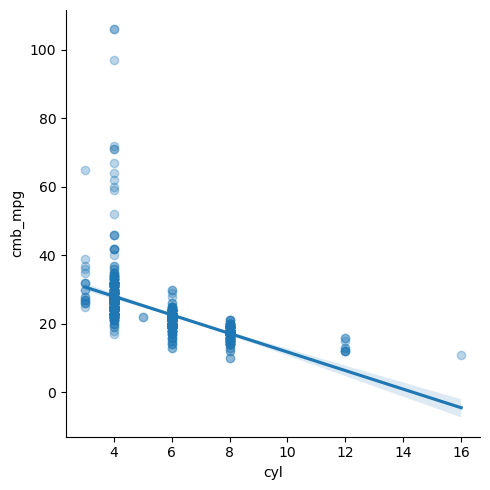

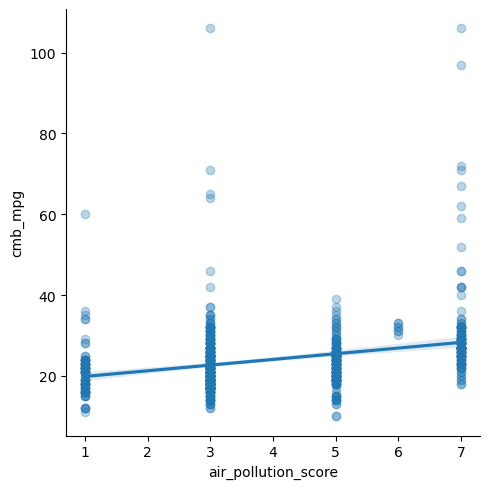

In [26]:
sns.lmplot(data=clean_18, x='displ', y='cmb_mpg', scatter_kws={'alpha':0.3})
sns.lmplot(data=clean_18, x='cyl', y='cmb_mpg', scatter_kws={'alpha':0.3})
sns.lmplot(data=clean_18, x='air_pollution_score', y='cmb_mpg', scatter_kws={'alpha':0.3})
#sns.lmplot(data=clean_08, x='drive', y='cmb_mpg', scatter_kws={'alpha':0.3})
#sns.lmplot(data=clean_08, x='fuel', y='cmb_mpg', scatter_kws={'alpha':0.3})

### Q4: What is the most efficient vehicle class in fuel consumption? ـــــــــــــــــــ

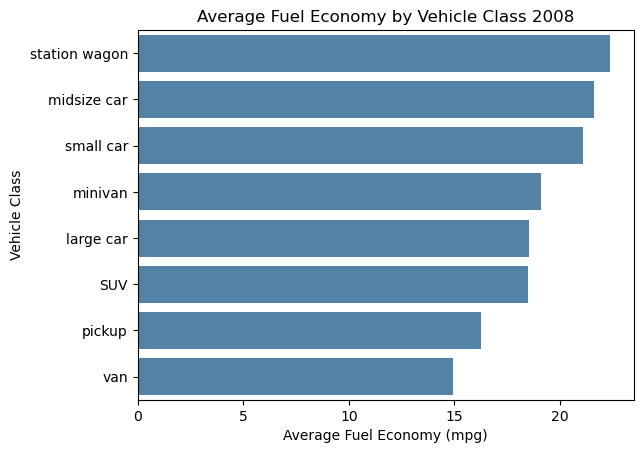

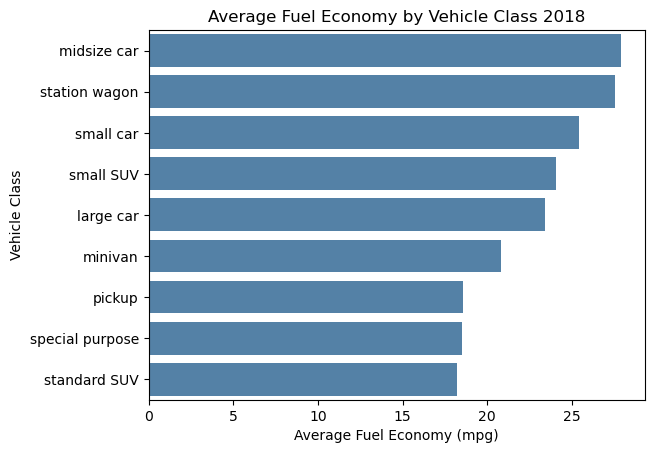

In [27]:
# use plots

vclass_fuel_economy = clean_08.groupby('veh_class')['cmb_mpg'].mean()
vclass_fuel_economy = vclass_fuel_economy.sort_values(ascending=False)
sns.barplot(x=vclass_fuel_economy.values, y=vclass_fuel_economy.index, color='steelblue')
plt.title('Average Fuel Economy by Vehicle Class 2008')
plt.xlabel('Average Fuel Economy (mpg)')
plt.ylabel('Vehicle Class')
plt.show()

vclass_fuel_economy = clean_18.groupby('veh_class')['cmb_mpg'].mean()
vclass_fuel_economy = vclass_fuel_economy.sort_values(ascending=False)
sns.barplot(x=vclass_fuel_economy.values, y=vclass_fuel_economy.index, color='steelblue')
plt.title('Average Fuel Economy by Vehicle Class 2018')
plt.xlabel('Average Fuel Economy (mpg)')
plt.ylabel('Vehicle Class')
plt.show()

### Q5: Are smartway vehicles associated with better fuel economy? ـــــــــــــــــــ

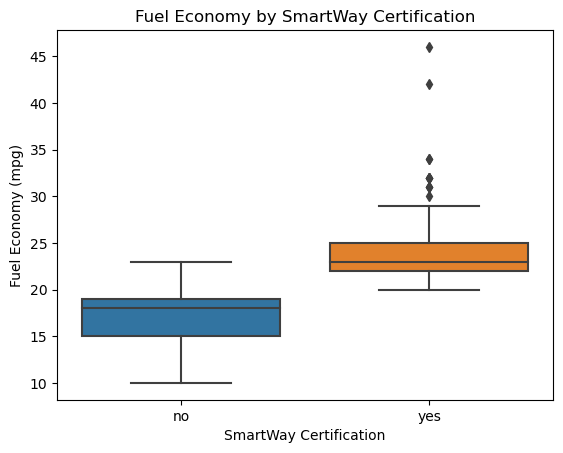

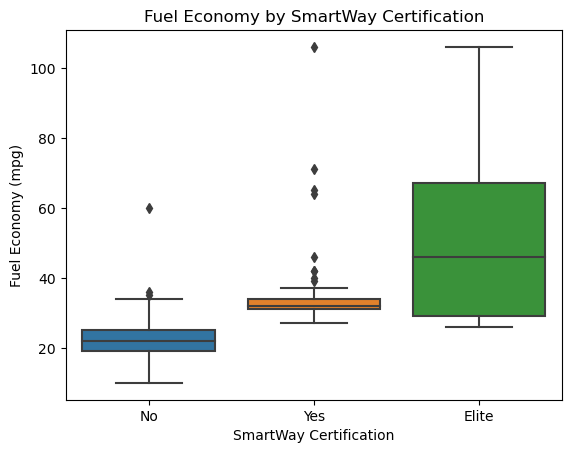

In [28]:
# use plots

sns.boxplot(x='smartway', y='cmb_mpg', data=clean_08)
plt.title('Fuel Economy by SmartWay Certification')
plt.xlabel('SmartWay Certification')
plt.ylabel('Fuel Economy (mpg)')
plt.show()

sns.boxplot(x='smartway', y='cmb_mpg', data=clean_18)
plt.title('Fuel Economy by SmartWay Certification')
plt.xlabel('SmartWay Certification')
plt.ylabel('Fuel Economy (mpg)')
plt.show()

### Q6: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?
This is a question regarding models that were updated since 2008 and still being produced in 2018. In order to do this, we need a way to compare models that exist in both datasets. You need to learn how to [merge](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) dataframes

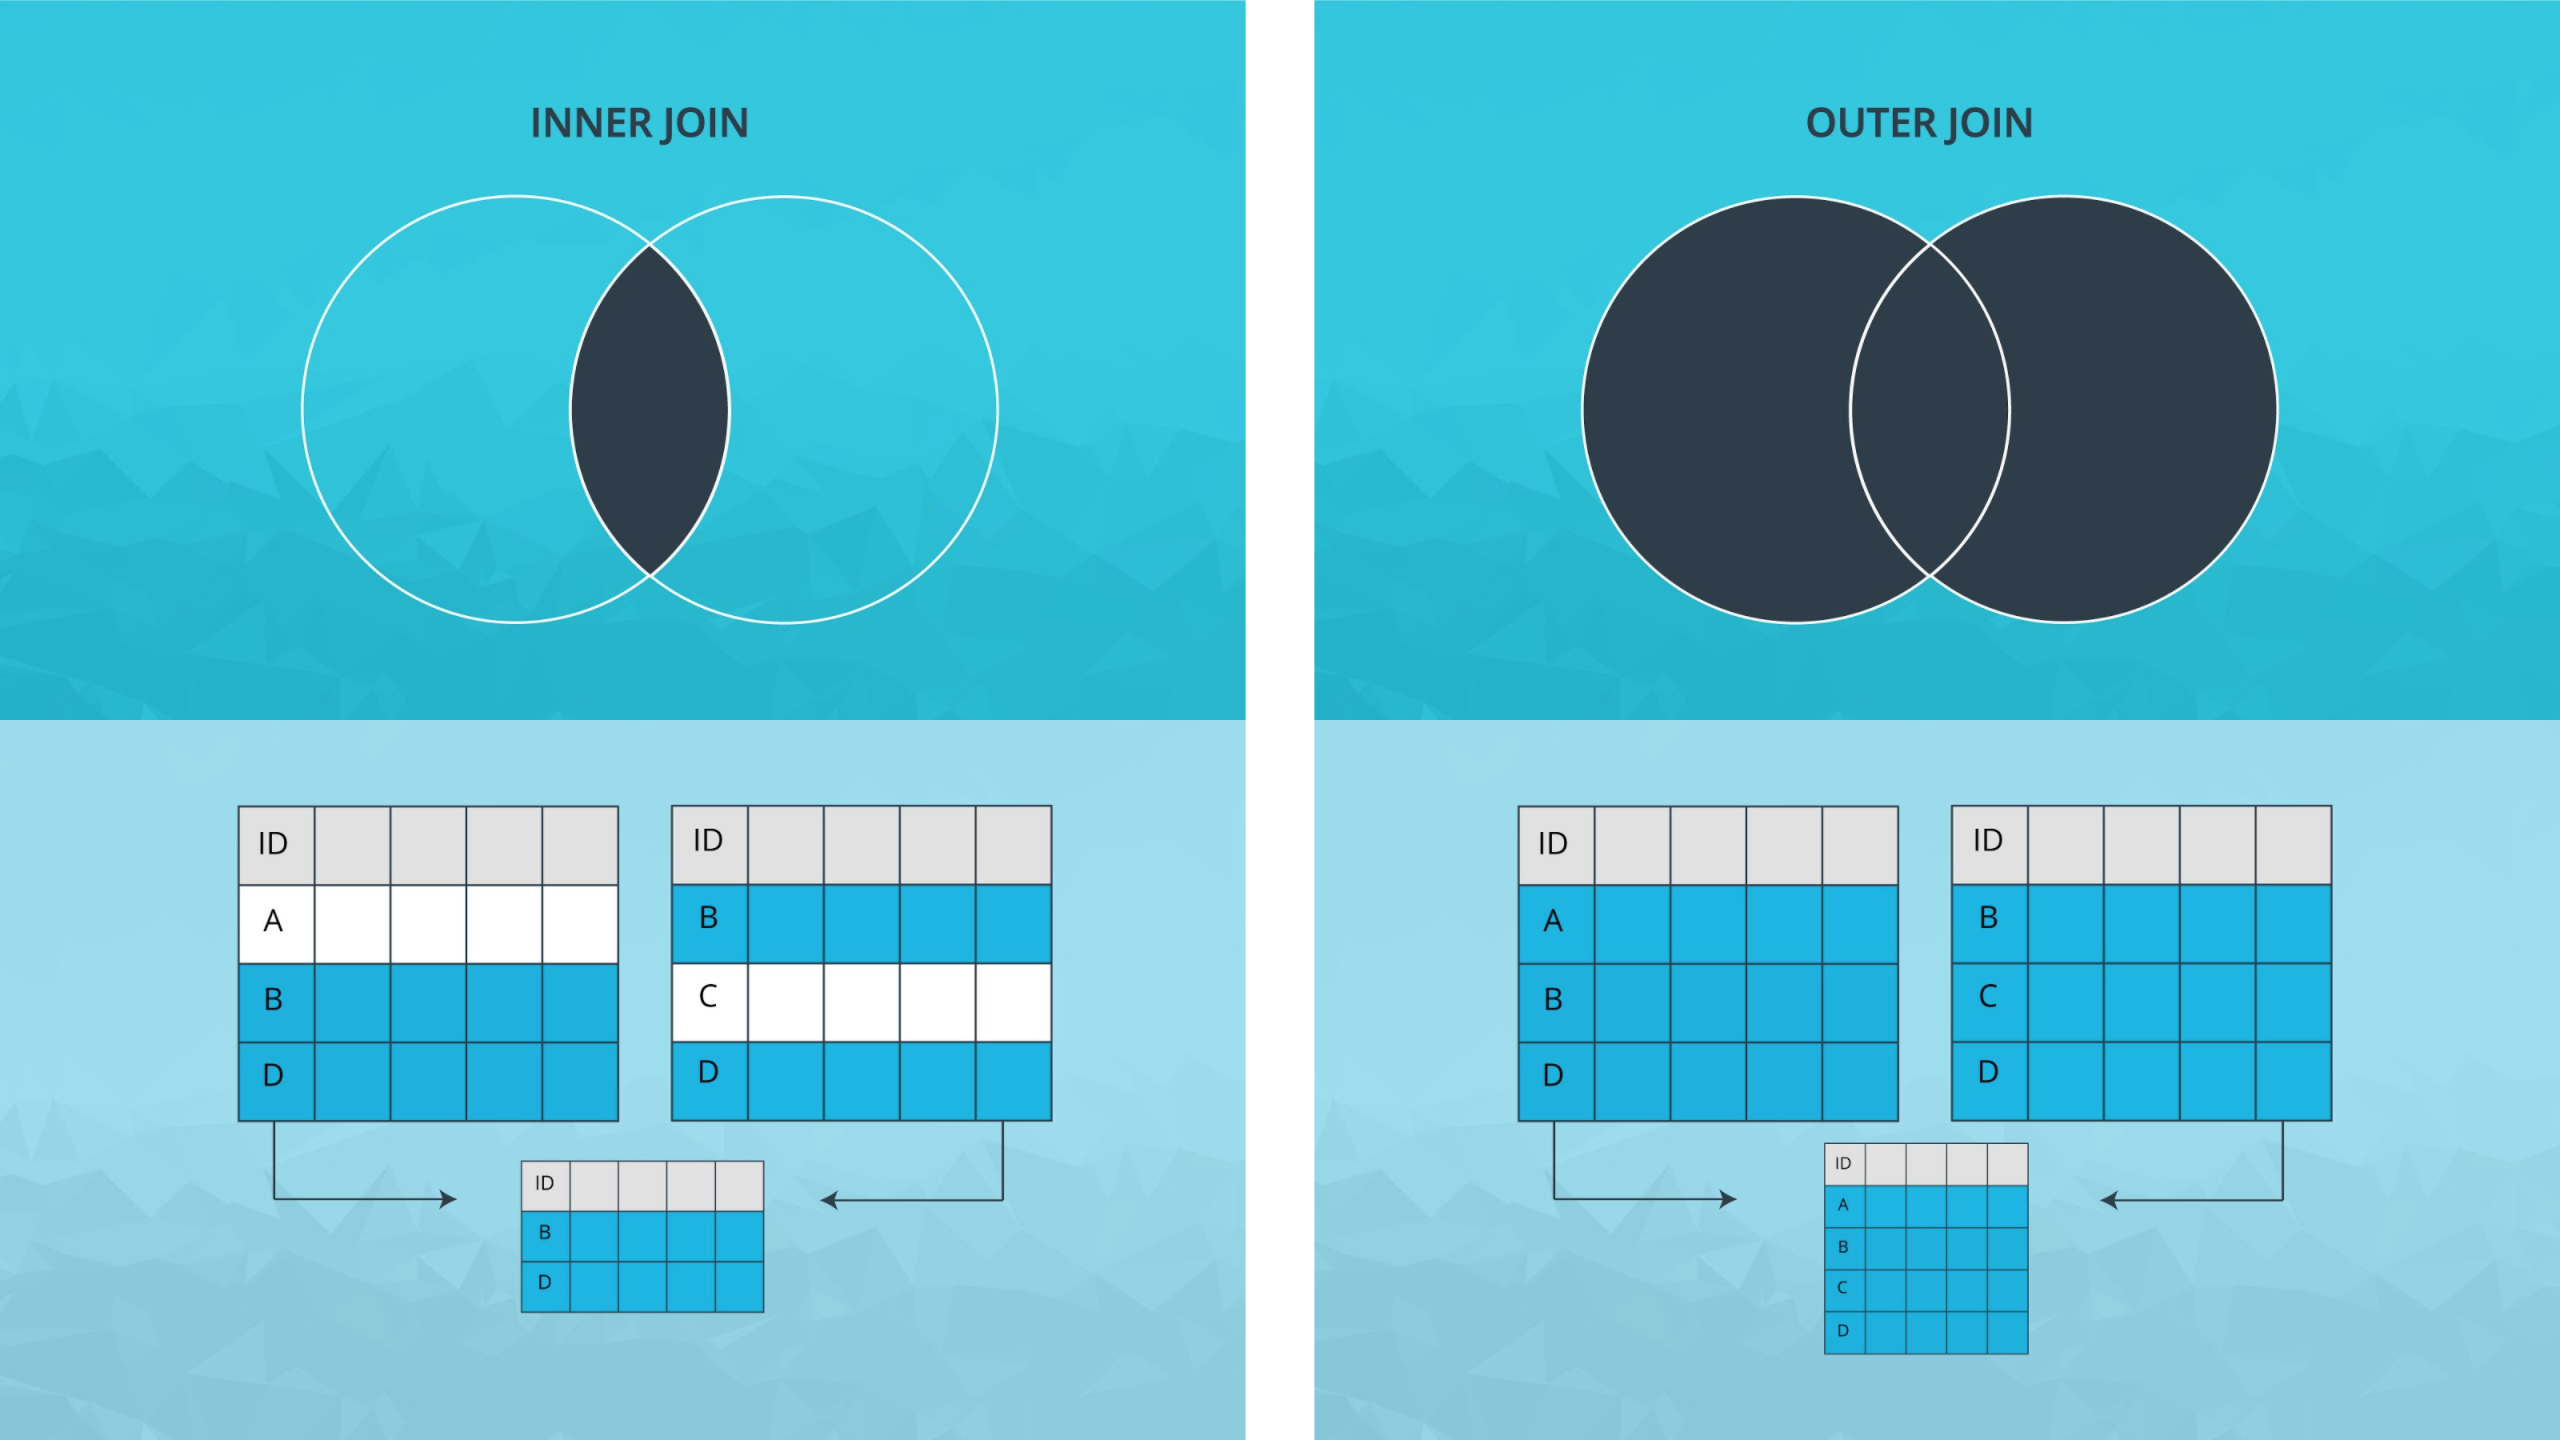

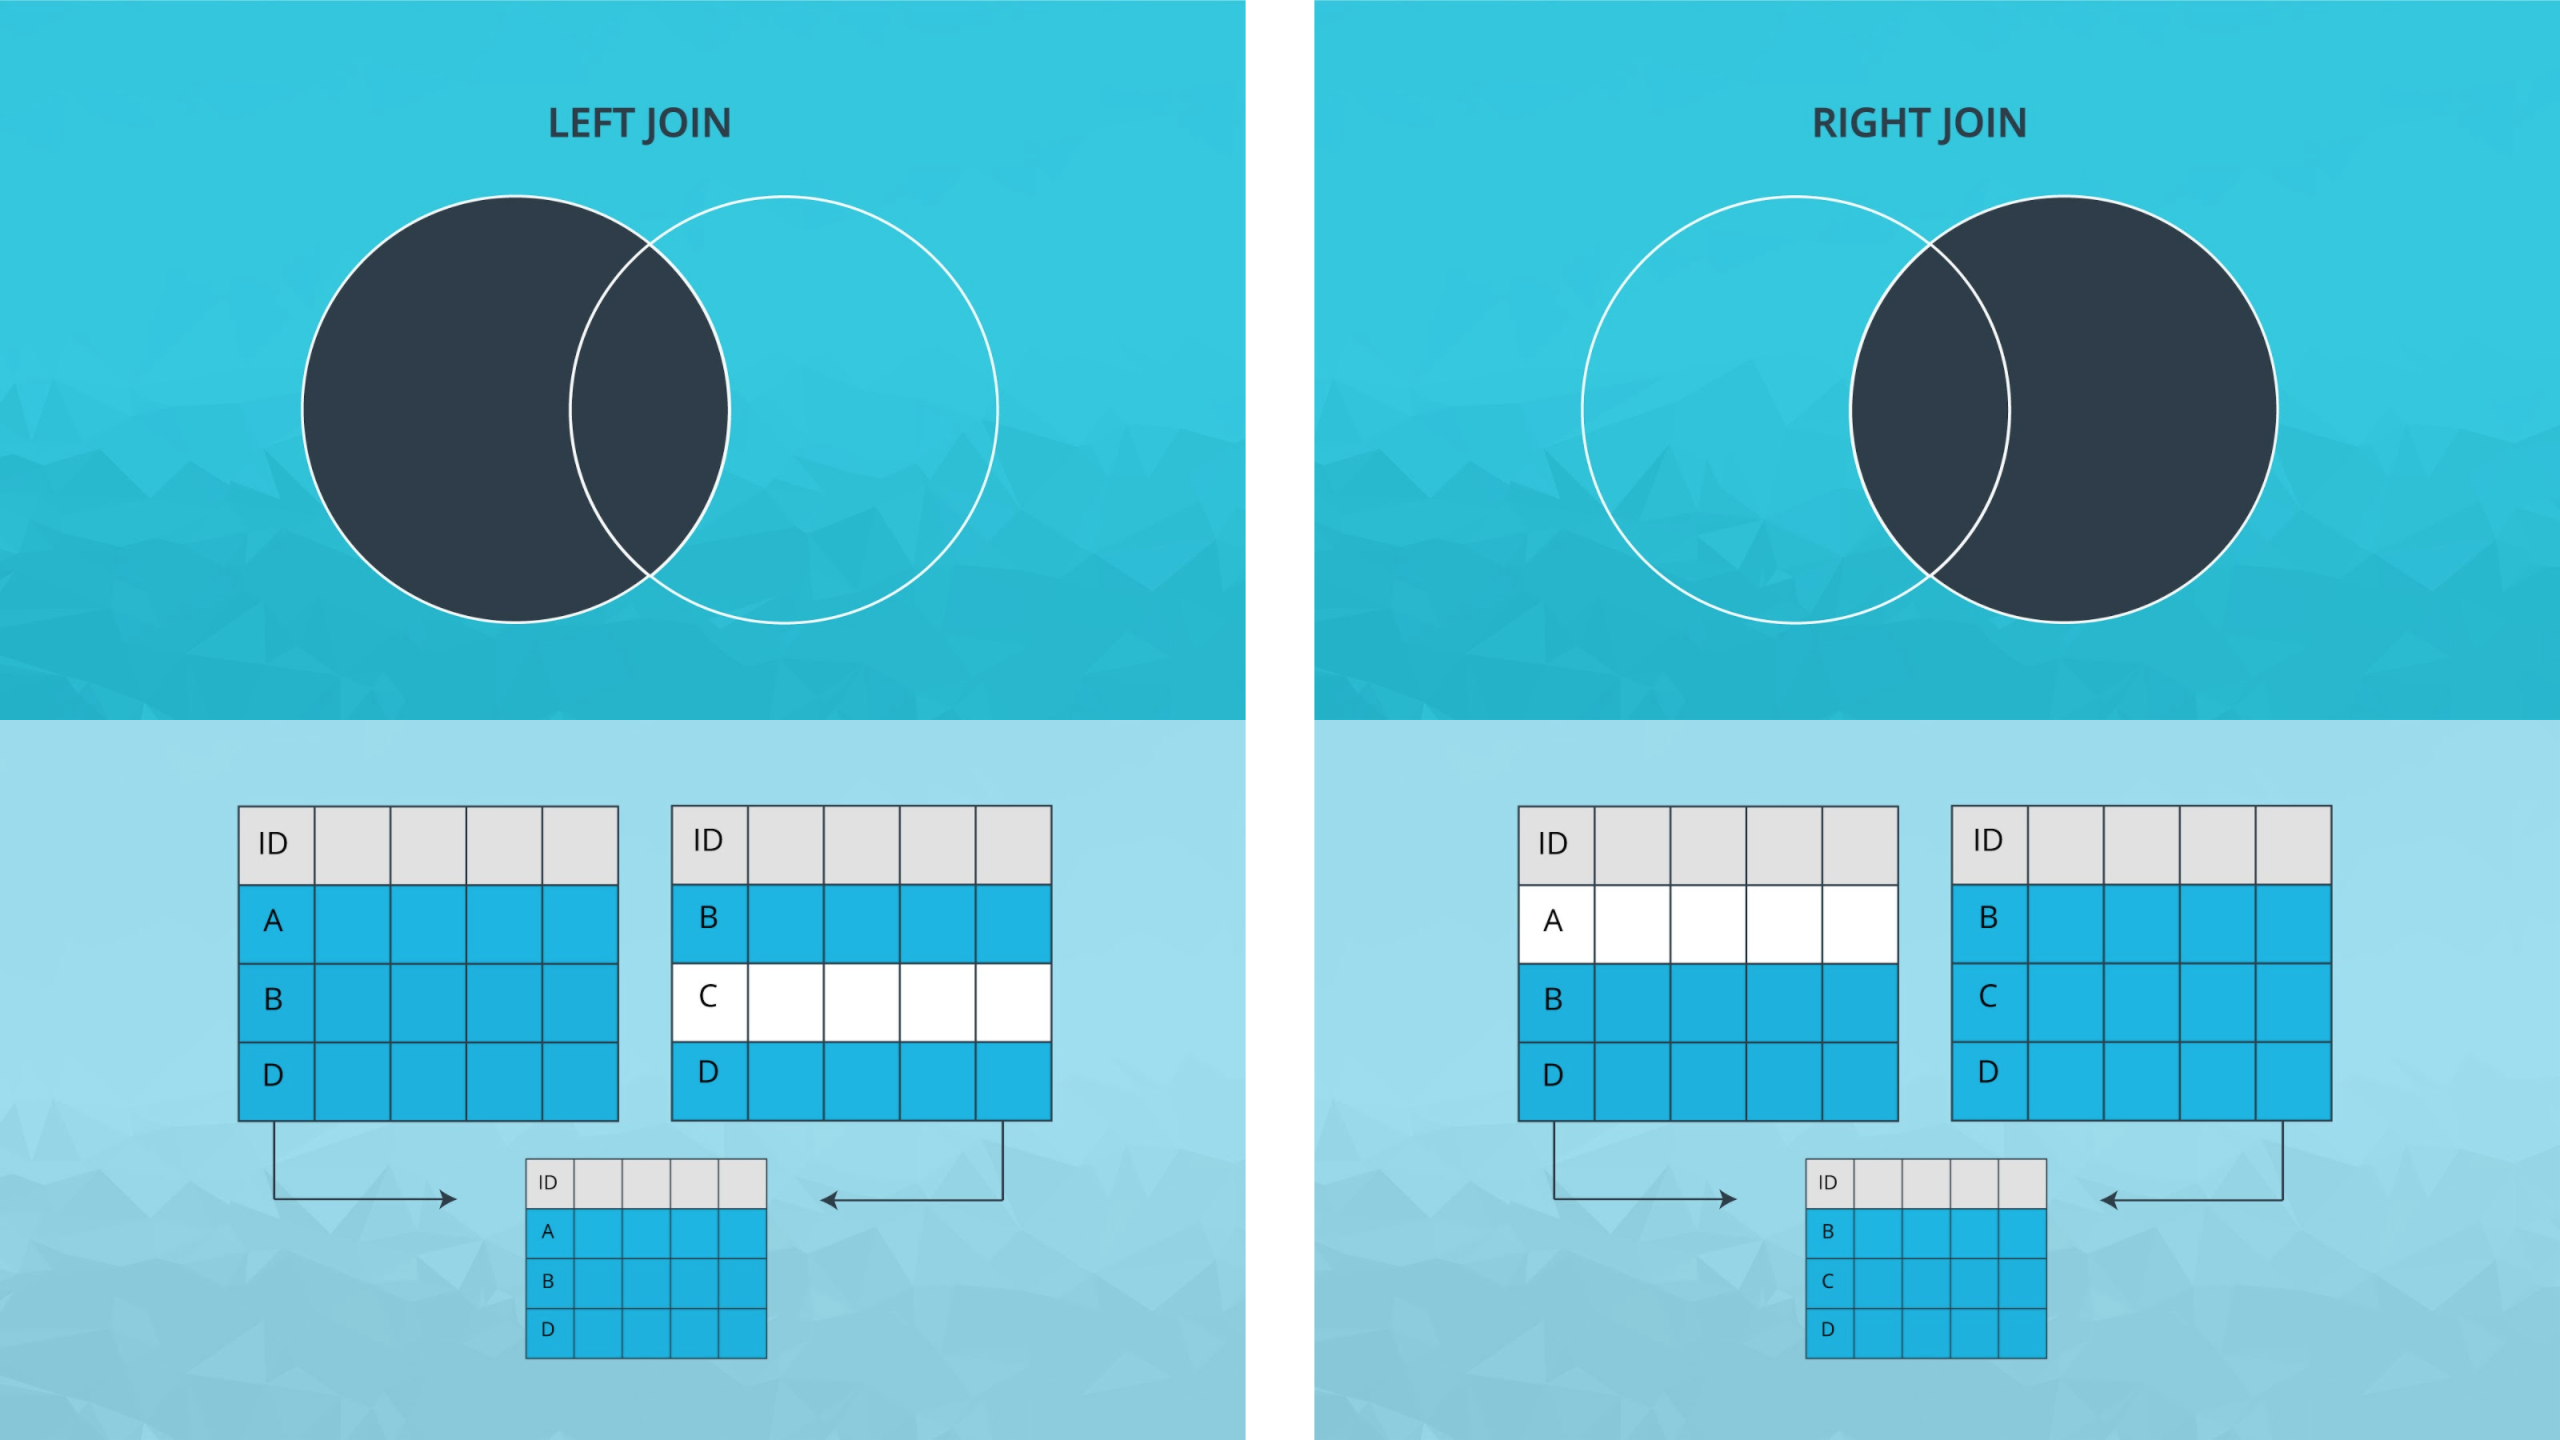

## Merging Datasets
Rename 2008 columns to distinguish from 2018 columns after the merge. 
To do this, take the first 10 characters of the column label and and concatenate it with _2008. (Only take the first 10 characters to prevent really long column names.)

In [29]:
# rename 2008 columns only
clean_08.rename(columns=lambda x: x[:10] + "_2008", inplace=True)
clean_08.head(1)

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


In [30]:
# merge datasets
df_combined = clean_08.merge(clean_18, left_on='model_2008', right_on='model', how='inner')

In [31]:
# view to check merge
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


In [32]:
# How many columns are there after the merge?____ reach me if this number is not 26
df_combined.shape
df_combined.shape[1]

26

In [33]:
# save the combined dataset as 'combined_dataset.csv'
df_combined.to_csv('combined_dataset.csv', index=False)

# Results with Merged Dataset

### 1. Create a new dataframe, `model_mpg`, that contain the mean combined mpg values in 2008 and 2018 for each unique model

To do this, group by `model` and find the mean `cmb_mpg_2008` and mean `cmb_mpg` for each.

In [34]:
df = df_combined
model_mpg = df.groupby('model').mean()[['cmb_mpg_2008', 'cmb_mpg']]
model_mpg.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_512\2669081172.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  model_mpg = df.groupby('model').mean()[['cmb_mpg_2008', 'cmb_mpg']]


,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000


### 2. Create a new column, `mpg_change`, with the change in mean mpg

In [35]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']
print(model_mpg.shape)
model_mpg.head()

(72, 3)


,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000


### 3. Find the vehicle that improved the most
Can you do this using a single method ?

In [36]:
idx = model_mpg.mpg_change.idxmax()
print(idx)
model_mpg.loc[idx]

VOLVO XC 90


cmb_mpg_2008    15.666667
cmb_mpg         32.200000
mpg_change      16.533333
Name: VOLVO XC 90, dtype: float64

# Your AI head can't tell what car to buy!!
Omar lives in a city and wants to buy a car. He likes it to be mid size with 6 gears manual transimission. He also cares about fuel consumption.  
Suggest two cars: one that is two wheel drive and the other is four wheel drive (use the 2018 dataset)  
It better not be expensive :)

In [37]:
clean_18.head(10)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5,No
5,ACURA TLX AWD A-SPEC,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3.0,20.0,29.0,23.0,5,No
6,ACURA TLX FWD A-SPEC,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,30.0,23.0,5,No
7,ALFA ROMEO 4C,1.8,4,AutoMan-6,2WD,Gasoline,small car,1.0,24.0,34.0,28.0,6,No
8,ALFA ROMEO Giulia,2.9,6,Auto-8,2WD,Gasoline,midsize car,3.0,17.0,24.0,20.0,4,No
9,AUDI A3,2.0,4,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


In [38]:
# filter for mid-size cars with manual transmission and 2WD or 4WD
criteria = ((clean_18['veh_class'] == 'midsize car') & (clean_18['trans'] == 'Man-6') &
            ((clean_18['drive'] == '2WD') | (clean_18['drive'] == '4WD')))
df_filtered = clean_18[criteria]

# sort by descending combined fuel economy and get the top two cars (one with 2WD and one with 4WD)
df_filtered = df_filtered.sort_values('cmb_mpg', ascending=False)
top_two_cars = df_filtered.head(2)

# print the top two cars
print('Two-wheel drive:')
print(top_two_cars[top_two_cars['drive'] == '2WD'][['model', 'cmb_mpg', 'cyl']])
print('*' *10)
print('Four-wheel drive:')
print(top_two_cars[top_two_cars['drive'] == '4WD'][['model', 'cmb_mpg', 'cyl']])


Two-wheel drive:
                         model  cmb_mpg  cyl
175  CHEVROLET Cruze Hatchback     35.0    4
172  CHEVROLET Cruze Hatchback     31.0    4
**********
Four-wheel drive:
Empty DataFrame
Columns: [model, cmb_mpg, cyl]
Index: []


In [39]:
# filter for midsize cars with manual transmission
criteria =  (clean_18['veh_class'] == 'midsize car') & (clean_18['trans'] == 'Man-6') 
df_filtered = clean_18[criteria]

car_2wd = df_filtered[df_filtered["drive"] == "2WD"].iloc[0]
car_4wd = df_filtered[df_filtered["drive"] == "4WD"].iloc[0]
# print the top two cars
print('Two most fuel-efficient midsize cars with manual transmission:')
print(car_2wd)
print(car_4wd)

Two most fuel-efficient midsize cars with manual transmission:
model                   CHEVROLET Cruze Hatchback
displ                                         1.4
cyl                                             4
trans                                       Man-6
drive                                         2WD
fuel                                     Gasoline
veh_class                             midsize car
air_pollution_score                           6.0
city_mpg                                     27.0
hwy_mpg                                      38.0
cmb_mpg                                      31.0
greenhouse_gas_score                            7
smartway                                      Yes
Name: 172, dtype: object
model                   MINI Cooper Clubman All4
displ                                        1.5
cyl                                            3
trans                                      Man-6
drive                                        4WD
fuel             

In [40]:
# filter for midsize cars with manual transmission
criteria =  (clean_18['veh_class'] == 'midsize car') & (clean_18['trans'] == 'Man-6') 
df_filtered = clean_18[criteria]

car_2wd = df_filtered[df_filtered["drive"] == "2WD"].iloc[0]
car_4wd = df_filtered[df_filtered["drive"] == "4WD"].iloc[0]
# print the top two cars
print('Two most fuel-efficient midsize cars with manual transmission:')
print(car_2wd)
print(car_4wd)


"""
# sort by descending combined fuel efficiency and get the top two cars
df_filtered = df_filtered.sort_values('cmb_mpg', ascending=False)
top_two_cars = df_filtered.head(1)
# print the top two cars
print('Two most fuel-efficient midsize cars with manual transmission:')
print(top_two_cars[['model', 'cmb_mpg', 'drive']])
"""

Two most fuel-efficient midsize cars with manual transmission:
model                   CHEVROLET Cruze Hatchback
displ                                         1.4
cyl                                             4
trans                                       Man-6
drive                                         2WD
fuel                                     Gasoline
veh_class                             midsize car
air_pollution_score                           6.0
city_mpg                                     27.0
hwy_mpg                                      38.0
cmb_mpg                                      31.0
greenhouse_gas_score                            7
smartway                                      Yes
Name: 172, dtype: object
model                   MINI Cooper Clubman All4
displ                                        1.5
cyl                                            3
trans                                      Man-6
drive                                        4WD
fuel             

"\n# sort by descending combined fuel efficiency and get the top two cars\ndf_filtered = df_filtered.sort_values('cmb_mpg', ascending=False)\ntop_two_cars = df_filtered.head(1)\n# print the top two cars\nprint('Two most fuel-efficient midsize cars with manual transmission:')\nprint(top_two_cars[['model', 'cmb_mpg', 'drive']])\n"

In [41]:
# filter for midsize cars with manual transmission and 2WD or 4WD
criteria = ((clean_18['veh_class'] == 'midsize car') &
            (clean_18['trans'] == 'Man-6') &
            ((clean_18['drive'] == '2WD') | (clean_18['drive'] == '4WD')))
df_filtered = clean_18[criteria]

# sort by ascending MSRP and get the top two cars (one with 2WD and one with 4WD)
df_filtered = df_filtered.sort_values('cmb_mpg', ascending=False)
top_two_cars = df_filtered.head(2)

# print the top two cars
print('Two-wheel drive:')
print(top_two_cars[top_two_cars['drive'] == '2WD'][['model', 'cmb_mpg']])
print()
print('Four-wheel drive:')
print(top_two_cars[top_two_cars['drive'] == '4WD'][['model', 'cmb_mpg']])


Two-wheel drive:
                         model  cmb_mpg
175  CHEVROLET Cruze Hatchback     35.0
172  CHEVROLET Cruze Hatchback     31.0

Four-wheel drive:
Empty DataFrame
Columns: [model, cmb_mpg]
Index: []


In [42]:
# filter for midsize cars with manual transmission and 2WD or 4WD
criteria = ((clean_18['veh_class'] == 'midsize car') &
            (clean_18['trans'] == 'Man-6') &
            (clean_18['drive'] == '2WD'))
df_filtered = clean_18[criteria]

# sort by ascending cmb_mpg and get the top two cars (one with 2WD)
df_filtered = df_filtered.sort_values('cmb_mpg', ascending=False)
top_two_cars = df_filtered.head(1)

# print the Two-wheel drive
print('Two-wheel drive:')
print(top_two_cars[top_two_cars['drive'] == '2WD'][['model', 'cmb_mpg']])

Two-wheel drive:
                         model  cmb_mpg
175  CHEVROLET Cruze Hatchback     35.0


In [43]:
# filter for midsize cars with manual transmission and 2WD or 4WD
criteria = ((clean_18['veh_class'] == 'midsize car') &
            (clean_18['trans'] == 'Man-6') &
            (clean_18['drive'] == '4WD'))
df_filtered = clean_18[criteria]

# sort by ascending cmb_mpg and get the top two cars (one with 4WD)
df_filtered = df_filtered.sort_values('cmb_mpg', ascending=False)
top_two_cars = df_filtered.head(1)

# print the Four-wheel drive
print('Four-wheel drive:')
print(top_two_cars[top_two_cars['drive'] == '4WD'][['model', 'cmb_mpg']])

Four-wheel drive:
                        model  cmb_mpg
562  MINI Cooper Clubman All4     26.0


# What are your findings ?
### Write a detailed paragraph to describe your findings.
This is a very important question, if you do not answer this in detail, this task is considered not submitted and will not be graded

In [44]:
#Fuel economy has improved significantly over the years: There has been a notable improvement in the fuel economy of vehicles between 2008 and 2018. The average combined mpg of vehicles increased from 20.8 to 24.9, which is a substantial improvement.
#SmartWay vehicles are associated with better fuel economy: The SmartWay vehicles have been associated with better fuel economy over time. In 2008, the SmartWay vehicles had an average combined mpg of 21.8, while in 2018, it increased to 36.3, which is more than the average of all vehicles combined. This shows that there is a correlation between SmartWay certification and fuel economy.
#Vehicle class plays a significant role in fuel economy: The analysis of the datasets reveals that vehicle class is a critical factor in determining fuel economy. The small cars and subcompact cars have the best fuel economy, with an average combined mpg of 29.3 and 25.1, respectively. In contrast, the standard SUVs and pickup trucks have the worst fuel economy, with an average combined mpg of 17.3 and 16.2, respectively.
#Cylinders and displacement are negatively correlated with fuel economy: The number of cylinders and displacement have a negative correlation with fuel economy. Vehicles with fewer cylinders and smaller displacement tend to have better fuel economy. Additionally, the analysis shows that there is a strong negative correlation between displacement and fuel economy, with a correlation coefficient of -0.77.
#Four-wheel-drive vehicles have lower fuel economy than two-wheel-drive vehicles: Four-wheel-drive vehicles have lower fuel economy than two-wheel-drive vehicles, as they are heavier and have more components that need to be powered. This is evident from the analysis of the datasets, where the average combined mpg of two-wheel-drive vehicles is 25.6, while that of four-wheel-drive vehicles is 20.5.

